### Support Vector Machine

#### Hyperplanes

\begin{align}
\mathcal{H_0}: wx_i+b &= 0 \\
\mathcal{H_1}: wx_i+b & \geq 1 \qquad\text{if  } y_i=1 \\
\mathcal{H_2}: wx_i+b & < 1 \qquad\text{if  } y_i=-1\\
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

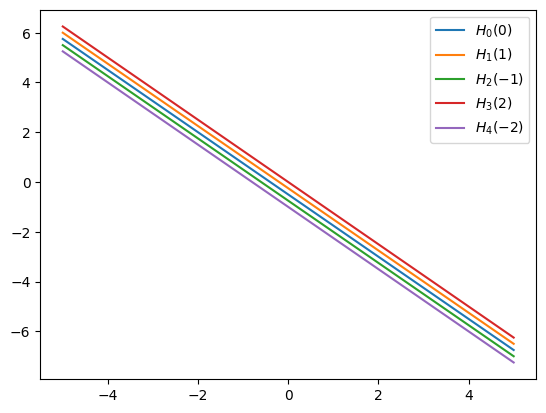

In [2]:
x1s = np.linspace(-5,5,100)
# x2s = np.linspace(-5,5,100)
w1,w2,b = 5,4,2
x2s0 = (-b-w1*x1s)/w2
x2s1 = (1-b-w1*x1s)/w2
x2s3 = (2-b-w1*x1s)/w2
x2s2 = (-1-b-w1*x1s)/w2
x2s4 = (-2-b-w1*x1s)/w2
plt.plot(x1s,x2s0)
plt.plot(x1s,x2s1)
plt.plot(x1s,x2s2)
plt.plot(x1s,x2s3)
plt.plot(x1s,x2s4)
plt.legend(['$H_0 (0)$','$H_1 (1)$',
            '$H_2 (-1)$', '$H_3 (2)$', '$H_4 (-2)$'])

In [3]:
X = np.array([[1, 1], [1, 2],[2,1],[2,2],[-1,1],[-1,2],[-2,1],[-2,2],
              [1, -1], [1, -2],[2,-1],[2,-2],[-1,-1],[-1,-2],[-2,-1],[-2,-2]])
y = np.array([1,1,1,1,-1,-1,-1,-1,
              1,1,1,1,-1,-1,-1,-1])
w = np.array([[-1, -0.75]])
b = 1
print(w.shape)

(1, 2)


In [4]:
def plot_decision_boundary(X, y, w):
    """
    X --> Inputs
    y --> Outputs
    w --> weight parameters: ndarray with size(1,2)
    """
   
    # Plotting
    plt.figure(figsize=(10, 8))
    # if y == -1, red point
    # if y == 1, blue point
    plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], "r^")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    if(w[0,1]==0):
        plt.axvline(color="black")
    else:
        plt.axline((0, 0), slope=-w[0,0] /w[0,1], color="black")
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

### Hard Margin

\begin{align*}
&\text{minimize}_{\mathbf{w},b} & \frac{1}{2}\mathbf{w}^\top \mathbf{w} \\
&\text{subject to } \quad & y_i(\mathbf{w}^\top x_i+b) \geq 1
\end{align*}

where $y_i$ is the ground truth, $x_i$ the input, if $y_i$ and the prediction from $\mathbf{w}^\top x_i+b$ matches should be greater than 1. 

$$\mathcal{J}(\mathbf{w},b) = \frac{\lambda}{2}\mathbf{w}^\top\mathbf{w}+\frac{1}{n}\sum^n_{i=1}\big(1-y_i(\mathbf{w}^\top \mathbf{x}_i+b)\big)$$

\begin{align*}
\nabla_\mathbf{w}\mathbf{J} &= \lambda\mathbf{w}-y_i\mathbf{x}_i \\
\nabla_b\mathbf{J} &= -y_i \\
\mathbf{w} &\leftarrow \mathbf{w} - \alpha\nabla_\mathbf{w}\mathbf{J} \\
b &\leftarrow b - \alpha\nabla_b\mathbf{J} \\
\end{align*}

In [5]:
class SVM:
    X, y = None, None
    w, b = None, None
    lr, lamb = 0.01, 1
    epochs = 100
    def __init__(self):
        pass
        
    def set_data(self, X, y):
        self.X = X
        self.y = y
        
    def set_params(self, w, b):
        self.w = w
        self.b = b
        
    def set_hyperparams(self, lr, epochs, lamb):
        self.lr = lr
        self.epochs = epochs
        self.lamb = lamb
        
    def activation(self, value):
        return 1 if value>=0 else -1
    
    def eval_err_rate(self):
        n, D = self.X.shape
        n_miss = 0
        for j in range(n):
            wx = np.dot(self.w,self.X[j])
            y_pred = self.activation(wx)
            if y_pred!=self.y[j]:
                n_miss+=1
        return n_miss/n
        
    def compute_cost(self):
        loss = np.mean(1-(np.dot(self.X,
                    self.w.T)+self.b).squeeze()*self.y)
        loss += self.lamb/2*np.sum(self.w**2)
        return loss
        
    def fit(self):
        n, D = self.X.shape
        plot_decision_boundary(
            self.X, self.y, self.w)
        print(self.w, self.b)
        costs, errs = [], []
        for epoch in range(self.epochs):
            costs.append(self.compute_cost())
            errs.append(self.eval_err_rate())
            for j in random.sample(list(range(n)),n):
                gradw = self.lamb*self.w-self.y[j]*self.X[j]
                gradb = -self.y[j]
                self.w -= self.lr*gradw
                self.b -= self.lr*gradb
            
        plot_decision_boundary(
            self.X, self.y, self.w)
        print(self.w, self.b)
        costs.append(self.compute_cost())
        errs.append(self.eval_err_rate())
        return costs, errs

In [6]:
model = SVM()
model.set_data(X.copy(), y.copy())
model.set_params(w.copy(), b)
model.set_hyperparams(5e-3, 100, 1)

[[-1.   -0.75]] 1
[[ 1.49900598e+00 -9.49058926e-04]] 0.9999999999999999


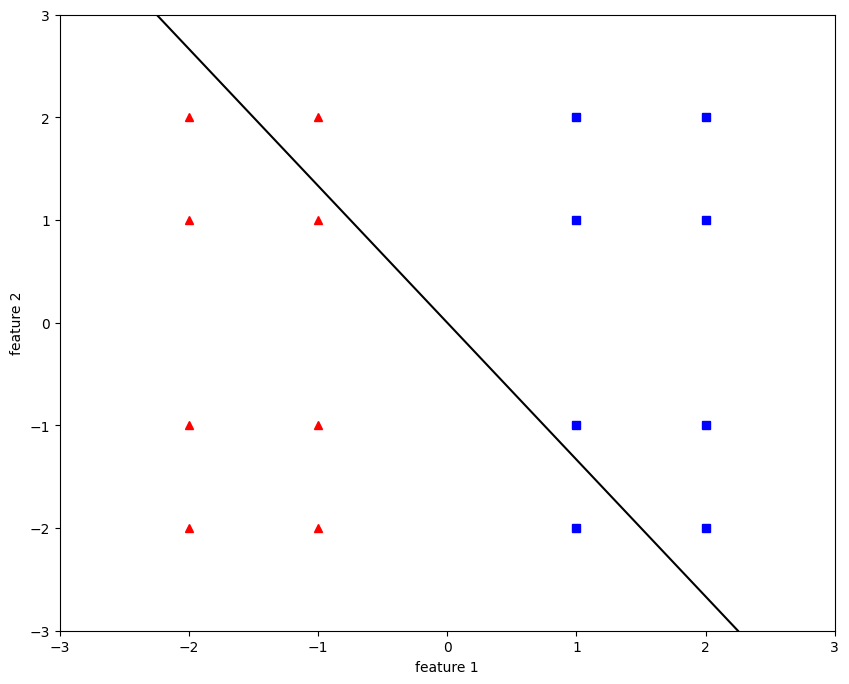

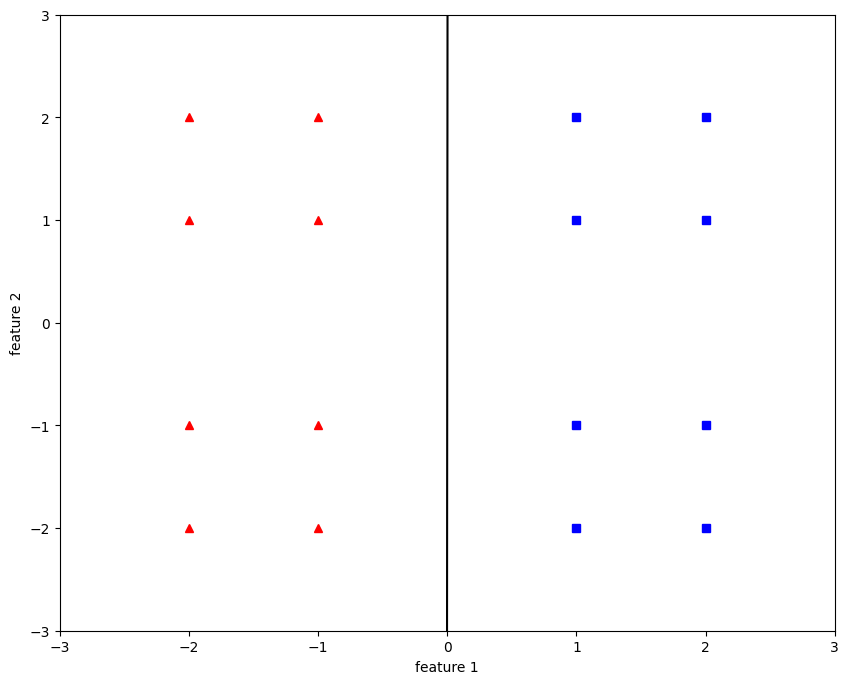

In [7]:
costs, errs = model.fit()

Text(0, 0.5, 'cost')

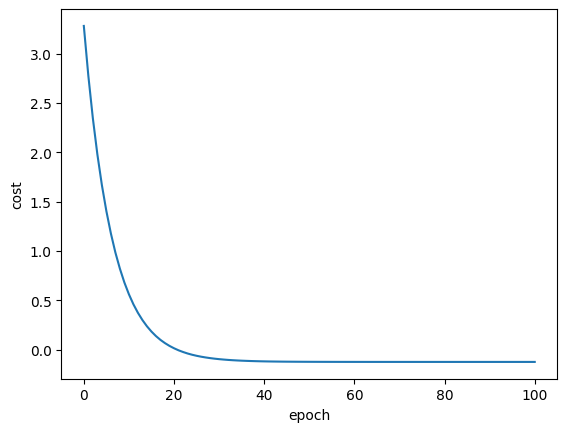

In [8]:
plt.plot(costs)
plt.xlabel('epoch')
plt.ylabel('cost')

Text(0, 0.5, 'error rate')

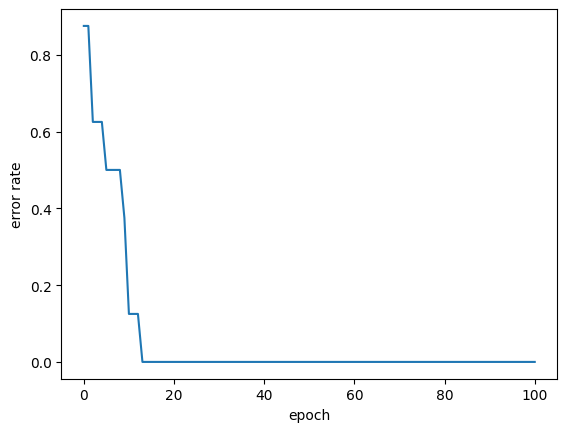

In [9]:
plt.plot(errs)
plt.xlabel('epoch')
plt.ylabel('error rate')

### Soft Margin
$$\mathcal{J}(\mathbf{w},b) = \frac{\lambda}{2}\mathbf{w}^\top\mathbf{w} + \frac{1}{b}\sum^n_{i=1}\max\big(0, 1-y_i(\mathbf{w}_i^\top\mathbf{x_i}+b)\big)$$

#### References
1. https://towardsdatascience.com/implementing-svm-from-scratch-784e4ad0bc6a
2. https://en.wikipedia.org/wiki/Sign_function
3. https://towardsdatascience.com/algorithms-from-scratch-support-vector-machine-6f5eb72fce10
4. https://jonathan-hui.medium.com/rl-dual-gradient-descent-fac524c1f049
5. https://www.baeldung.com/cs/svm-hard-margin-vs-soft-margin